#### Pavlo Yatluk
#### dz_45


### ЗАВДАННЯ

#### Використовуючи модель ARIMA і датасет Yearly sunspots data 1700-2008 побудуйте прогноз на 2009-2030 р.р.

#### Детальніше про даний датасет:
https://www.statsmodels.org/dev/datasets/generated/sunspots.html

In [2]:
# імпорт необхідних бібліотек
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
# імпорт датасету
data_sun = sm.datasets.sunspots.load_pandas().data
data_sun

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


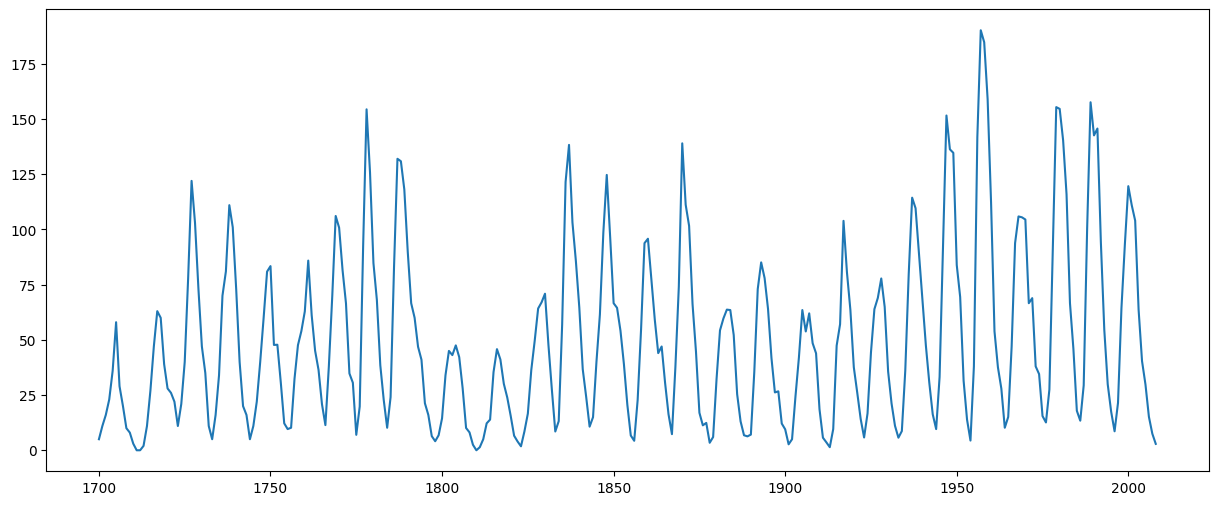

In [4]:
# візуалізація даних
plt.figure(figsize=(15, 6))
plt.plot(data_sun['YEAR'], data_sun['SUNACTIVITY'])
plt.show()

In [5]:
from pmdarima import auto_arima

In [6]:
# створюємо модель arima та обчислюємо найкращі показники p,d,q
model = auto_arima(data_sun['SUNACTIVITY'], seasonal=False,
                   stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2578.271, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2835.116, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2730.690, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2743.278, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2833.116, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2611.999, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2575.206, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2597.162, Time=0.22 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2577.675, Time=0.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2574.924, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2576.690, Time=0.23 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, T

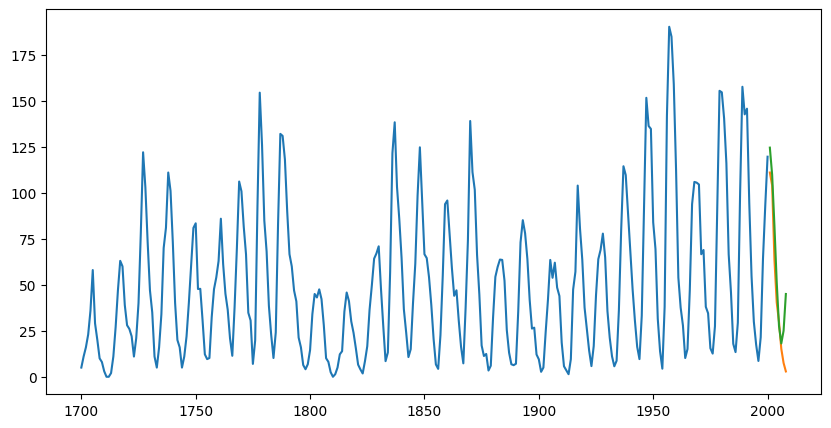

In [7]:
# Навчаємо модель 
train = data_sun.iloc[:-8]
test = data_sun.iloc[-8:]

model = ARIMA(train['SUNACTIVITY'], order=(2,1,3))
model_fit = model.fit()

# Прогнозуємо значення для тестового періоду
forecast = model_fit.forecast(len(test), alpha=0.05)

# Візуалізація прогнозу та реальних значень
plt.figure(figsize=(10,5))
plt.plot(train['YEAR'],train['SUNACTIVITY'], label='Train')
plt.plot(test['YEAR'],test['SUNACTIVITY'], label='Test')
plt.plot(test['YEAR'],forecast, label='Forecast')
plt.show()

In [8]:
# Прогнозуємо значення на весь доступний період
forecast = model_fit.forecast(len(data_sun), alpha=0.05)

# Метрики
mae = mean_absolute_error(data_sun['SUNACTIVITY'], forecast)
rmse = np.sqrt(mean_squared_error(data_sun['SUNACTIVITY'], forecast))

print('MAE:', mae)
print('MSE:', rmse)

MAE: 39.40410592951702
MSE: 46.45912838601471


In [10]:
# Прогноз до 2030 року
model = ARIMA(data_sun['SUNACTIVITY'], order=(2,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(21, alpha=0.05)

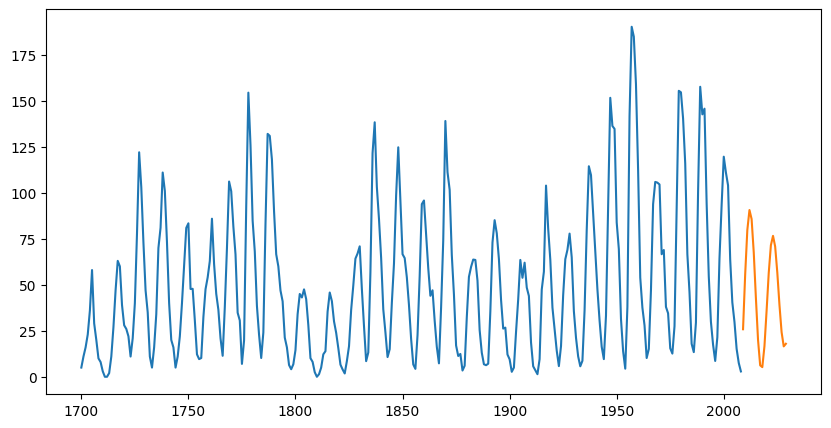

In [9]:
# Візуалізація прогнозу та реальних значень
plt.figure(figsize=(10,5))
plt.plot(data_sun['YEAR'], data_sun['SUNACTIVITY'])
plt.plot(pd.Series(range(2009,2030)), forecast)
plt.show()